In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import scipy.linalg
from pathlib import Path

from dppy.finite_dpps import FiniteDPP

from regdpp.general import ROOT_DIR
from regdpp.sample import RegDPP

In [2]:
data_dir = Path(ROOT_DIR, 'data')

In [3]:
dataset = "mg_scale"

In [4]:
data = np.loadtxt(Path(data_dir, f'{dataset}.csv'), dtype=str)

In [5]:
f = lambda x: x[2:]
f = np.vectorize(f)
X = f(data[:, 1:]).astype(float)
Y = data[:, :1].astype(float)

In [6]:
n, d = X.shape

In [11]:
# from tqdm import tqdm
from tqdm.notebook import trange, tqdm

k_range = np.arange(d, 5*d, 3)
n_repeat = 5
A_criteria = np.empty((len(k_range), n_repeat))
times = np.empty(len(k_range))

for k_id, k in tqdm(list(enumerate(k_range))):
    print(f'Looking for subset of size {k}')
    A = 1./n * np.eye(d)
    p = np.ones(n) * k / n

    sampler = RegDPP()
    for rep_id in trange(n_repeat):
        S = sampler(X, A, p)

        X_S = X[S]
        subset_cov = X_S.T @ X_S
        A_optimal_criterium = np.trace(np.linalg.inv(subset_cov + A))
        A_criteria[k_id, rep_id] = A_optimal_criterium
    print(f'Time of sampling: {np.mean(sampler.time_cnts):.3f} +- {1.96 * np.std(sampler.time_cnts):.3f}')


  0%|          | 0/8 [00:00<?, ?it/s]

Looking for subset of size 6


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.758 +- 0.449
Looking for subset of size 9


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.756 +- 0.109
Looking for subset of size 12


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.732 +- 0.096
Looking for subset of size 15


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.770 +- 0.285
Looking for subset of size 18


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.764 +- 0.248
Looking for subset of size 21


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.714 +- 0.208
Looking for subset of size 24


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.882 +- 0.274
Looking for subset of size 27


  0%|          | 0/5 [00:00<?, ?it/s]

Time of sampling: 0.759 +- 0.284


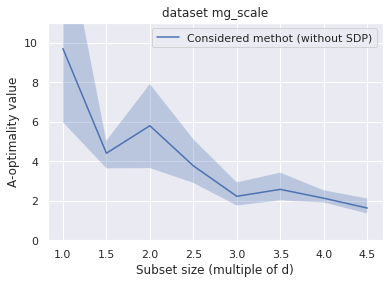

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme()

label = "Considered methot (without SDP)"
plt.plot(k_range / d, A_criteria.mean(1), label=label)

ci = stats.bootstrap((A_criteria.T,), np.mean, axis=0, confidence_level=0.95).confidence_interval
plt.fill_between(k_range / d, ci.low, ci.high, alpha=0.3)

plt.ylim(0, 11)
plt.xlabel('Subset size (multiple of d)')
plt.ylabel('A-optimality value')
plt.title(f'dataset {dataset}')
plt.legend()
plt.show()